In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf


x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

###
filter_summary = tf.image_summary('conv1', W_conv1)
###

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
conv1out = W_conv1*1
h_conv1out = h_conv1*1

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
conv2out = W_conv2*1
h_conv2out = h_conv2*1

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f457448c5d0>> ignored


In [15]:
w2s = dict()
w1s = dict()
# Launch the graph
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.initialize_all_variables())
summary_writer = tf.train.SummaryWriter('/logs', sess.graph_def)

for i in range(500):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        w1s[str(i)] = conv1out.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        w2s[str(i)] = conv2out.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        h1 = h_conv1out.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        h2 = h_conv2out.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        
        ###
        summary_writer.add_summary(filter_summary, i)
        ###
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

# print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.14
step 100, training accuracy 0.86
step 200, training accuracy 0.9
step 300, training accuracy 0.84
step 400, training accuracy 0.96


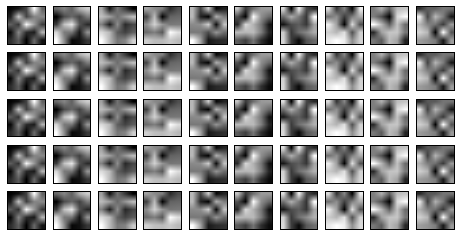

In [13]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

f, axarr = plt.subplots(5, 10, figsize = (8,4))
indices = np.linspace(0,400,5).astype(int)

i = 0
for ind in indices:
    kernel2 = w1s[str(ind)]
    for j in range(10):
        axarr[i, j].imshow(kernel2[:,:,0,j],cmap = 'gray')
        axarr[i, j].get_xaxis().set_visible(False)
        axarr[i, j].get_yaxis().set_visible(False)
    i += 1

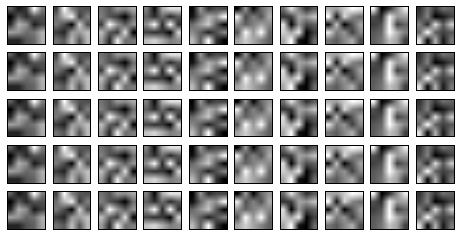

In [12]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

f, axarr = plt.subplots(5, 10, figsize = (8,4))
indices = np.linspace(0,400,5).astype(int)

i = 0
for ind in indices:
    kernel2 = w2s[str(ind)]
    for j in range(10):
        axarr[i, j].imshow(kernel2[:,:,0,j],cmap = 'gray')
        axarr[i, j].get_xaxis().set_visible(False)
        axarr[i, j].get_yaxis().set_visible(False)
    i += 1

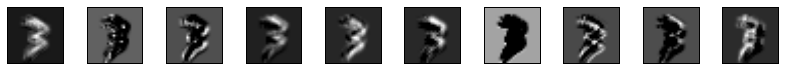

In [23]:
f, axarr = plt.subplots(1, 10, figsize = (14,1))
for i in range(10):
    axarr[i].imshow(h1[0,:,:,i+1],cmap='gray')
    axarr[i].get_xaxis().set_visible(False)
    axarr[i].get_yaxis().set_visible(False)

In [1]:
"""A very simple MNIST classifer, modified to display data in TensorBoard

See extensive documentation for the original model at
http://tensorflow.org/tutorials/mnist/beginners/index.md

See documentaion on the TensorBoard specific pieces at
http://tensorflow.org/how_tos/summaries_and_tensorboard/index.md

"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
sess = tf.InteractiveSession()

# Create the model
x = tf.placeholder("float", [None, 784], name="x-input")
W = tf.Variable(tf.zeros([784,10]), name="weights")
w_hist = tf.histogram_summary("weights", W)
b = tf.Variable(tf.zeros([10], name="bias"))
b_hist = tf.histogram_summary("biases", b)
with tf.name_scope("Wx_b") as scope:
  y = tf.nn.softmax(tf.matmul(x,W) + b)
y_hist = tf.histogram_summary("y", y)

# Define loss and optimizer
y_ = tf.placeholder("float", [None,10], name="y-input")
with tf.name_scope("xent") as scope:
  cross_entropy = -tf.reduce_sum(y_*tf.log(y))
  ce_summ = tf.scalar_summary("cross entropy", cross_entropy)
with tf.name_scope("train") as scope:
  train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

with tf.name_scope("test") as scope:
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  accuracy_summary = tf.scalar_summary("accuracy", accuracy)

merged = tf.merge_all_summaries()
writer = tf.train.SummaryWriter("./logdir", sess.graph)
tf.initialize_all_variables().run()

# Test trained model

for i in range(1000):
  if i % 10 == 0:  # Record summary data, and the accuracy
    feed = {x: mnist.test.images, y_: mnist.test.labels}
    result = sess.run([merged, accuracy], feed_dict=feed)
    summary_str = result[0]
    acc = result[1]
    writer.add_summary(summary_str, i)
    print("Accuracy at step %s: %s" % (i, acc))
  else:
    batch_xs, batch_ys = mnist.train.next_batch(100)
    feed = {x: batch_xs, y_: batch_ys}
    sess.run(train_step, feed_dict=feed)

print(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

writer.flush()
writer.close()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.098
Accuracy at step 10: 0.7404
Accuracy at step 20: 0.8041
Accuracy at step 30: 0.814
Accuracy at step 40: 0.8421
Accuracy at step 50: 0.8381
Accuracy at step 60: 0.8518
Accuracy at step 70: 0.8403
Accuracy at step 80: 0.8066
Accuracy at step 90: 0.8624
Accuracy at step 100: 0.871
Accuracy at step 110: 0.8864
Accuracy at step 120: 0.8973
Accuracy at step 130: 0.8957
Accuracy at step 140: 0.8817
Accuracy at step 150: 0.8612
Accuracy at step 160: 0.8835
Accuracy at step 170: 0.8527
Accuracy at step 180: 0.8993
Accuracy at step 190: 0.9012
Accuracy at step 200: 0.8909
Accuracy at step 210: 0.9038
Accuracy at step 220: 0.8846
Accuracy at step 230: 0.8921
Accuracy at step 240: 0.9017
Accuracy at step 250: 0.901
Accuracy at step 260: 0.8994
Accuracy at step 270: 0.9067
Accuracy at s